In [63]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [64]:
# Load the datasets
consumo_df = pd.read_csv('./CONSUMO.csv')
importacion_df = pd.read_csv('./IMPORTACION.csv')
precios_df = pd.read_csv('./PRECIOS.csv')

# Display the first few rows of each dataset to understand their structure
consumo_df.head(), importacion_df.head(), precios_df.head()

(        Fecha  Diesel            GLP    Regular      Super
 0  2000-01-01     0.0  194410.476190  202645.20  308156.82
 1  2000-02-01     0.0  174710.552381  205530.96  307766.31
 2  2000-03-01     0.0  189234.066667  229499.56  331910.29
 3  2000-04-01     0.0  174330.607143  210680.40  315648.08
 4  2000-05-01     0.0  191745.147619  208164.34  319667.97,
         Fecha  Diesel            GLP    Regular      Super
 0  2001-01-01     0.0  194065.738095  177776.50  373963.96
 1  2001-02-01     0.0  170703.380952  123115.99  243091.07
 2  2001-03-01     0.0  161837.371429  161726.42  312084.38
 3  2001-04-01     0.0  163048.642857  127338.74  285054.89
 4  2001-05-01     0.0  171518.861905  168730.19  300913.67,
         Fecha  Regular  Super  Diesel
 0  2002-01-01    12.19  12.55    8.95
 1  2002-02-01    11.90  12.29    8.66
 2  2002-03-01    12.17  12.58    8.69
 3  2002-04-01    13.71  14.11    9.38
 4  2002-05-01    13.79  14.16    9.44)

In [65]:
# Especificar inicio, fin y frecuencia
inicio_consumo = consumo_df['Fecha'].min()
fin_consumo = consumo_df['Fecha'].max()
frecuencia_consumo = 'Mensual'  # Dado que los datos son mensuales

inicio_importacion = importacion_df['Fecha'].min()
fin_importacion = importacion_df['Fecha'].max()
frecuencia_importacion = 'Mensual'

inicio_precios = precios_df['Fecha'].min()
fin_precios = precios_df['Fecha'].max()
frecuencia_precios = 'Mensual'

(inicio_consumo, fin_consumo, frecuencia_consumo), (inicio_importacion, fin_importacion, frecuencia_importacion), (inicio_precios, fin_precios, frecuencia_precios)


(('2000-01-01', '2024-05-01', 'Mensual'),
 ('2001-01-01', '2024-05-01', 'Mensual'),
 ('2002-01-01', '2024-12-01', 'Mensual'))

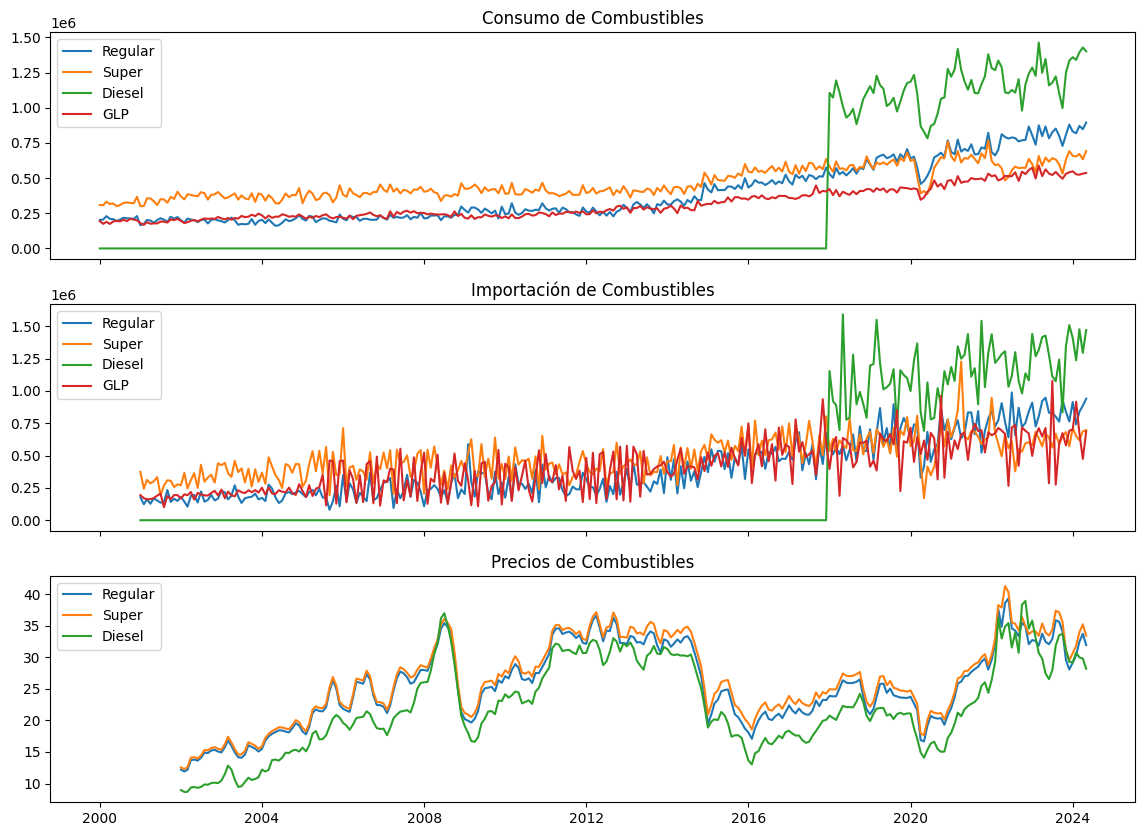

In [66]:
import matplotlib.pyplot as plt

# Convertir las fechas a datetime
consumo_df['Fecha'] = pd.to_datetime(consumo_df['Fecha'])
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'])
precios_df['Fecha'] = pd.to_datetime(precios_df['Fecha'])

# Graficar
fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
ax[0].plot(consumo_df['Fecha'], consumo_df[['Regular', 'Super', 'Diesel', 'GLP']])
ax[0].set_title('Consumo de Combustibles')
ax[0].legend(['Regular', 'Super', 'Diesel', 'GLP'])

ax[1].plot(importacion_df['Fecha'], importacion_df[['Regular', 'Super', 'Diesel', 'GLP']])
ax[1].set_title('Importación de Combustibles')
ax[1].legend(['Regular', 'Super', 'Diesel', 'GLP'])

ax[2].plot(precios_df['Fecha'], precios_df[['Regular', 'Super', 'Diesel']])
ax[2].set_title('Precios de Combustibles')
ax[2].legend(['Regular', 'Super', 'Diesel'])

plt.show()


**Exploración del Comportamiento de la Serie Durante y Después de la Pandemia**

Al analizar las series de tiempo de consumo, importación y precios de combustibles durante y después de la pandemia, se observa un comportamiento significativo y diferenciado en cada uno de los indicadores. En las gráficas de consumo de combustibles, se nota un incremento marcado en el consumo de Diesel alrededor del año 2020, coincidiendo con el inicio de la pandemia de COVID-19. Esta tendencia podría deberse a un aumento en la demanda de transporte y logística para el suministro de bienes esenciales. Las series de importación de combustibles también reflejan este cambio, mostrando un aumento en la importación de Diesel y una mayor volatilidad en las importaciones de Super y GLP durante el mismo periodo. Los precios de combustibles, por otro lado, muestran una notable caída alrededor del año 2020, seguida de una recuperación y estabilización en los años posteriores. Este comportamiento puede estar relacionado con las fluctuaciones en la demanda global de energía y las respuestas del mercado ante la incertidumbre económica causada por la pandemia. En general, la pandemia ha introducido cambios significativos en los patrones de consumo, importación y precios de combustibles, subrayando la importancia de monitorear estos indicadores para adaptarse a futuras disrupciones.

Valores faltantes en consumo_df antes de la interpolación:
Regular    0
Super      0
Diesel     0
GLP        0
dtype: int64
Valores faltantes en consumo_df después de la interpolación:
Regular    0
Super      0
Diesel     0
GLP        0
dtype: int64


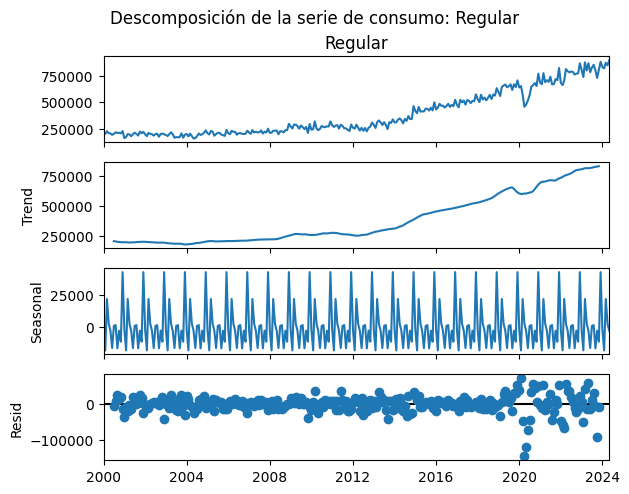

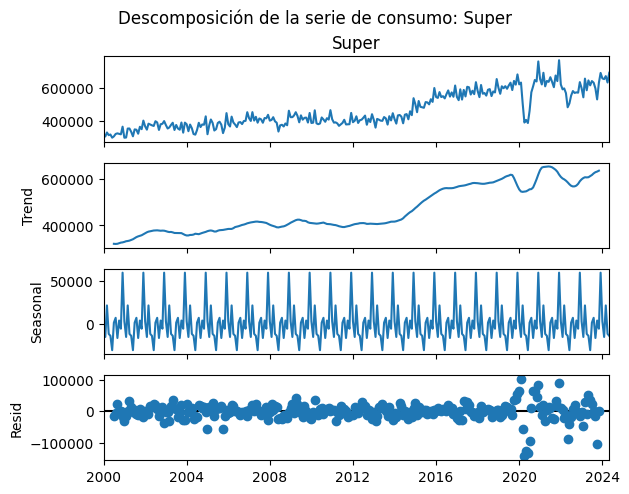

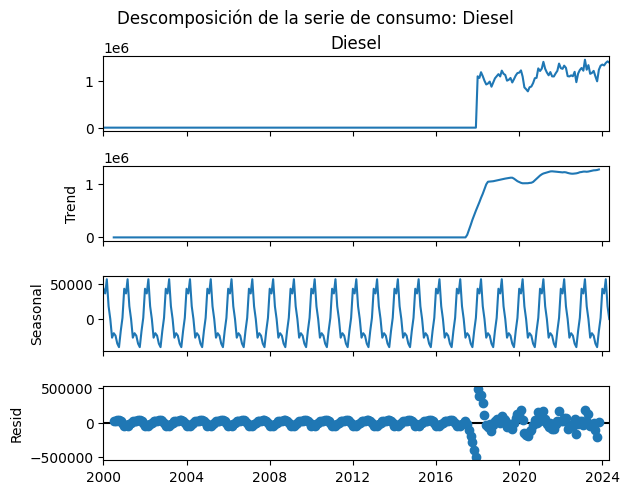

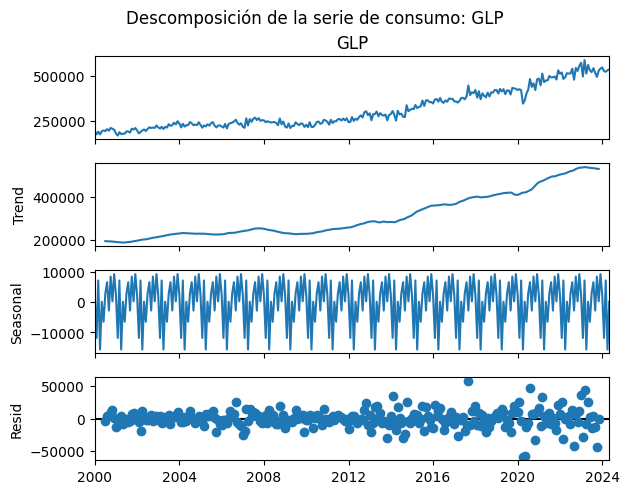

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Supongamos que los DataFrames precios_df, consumo_df e importacion_df ya están cargados con los datos necesarios

# Verificar si hay valores faltantes en consumo_df
missing_values_consumo = consumo_df[['Regular', 'Super', 'Diesel', 'GLP']].isna().sum()
print("Valores faltantes en consumo_df antes de la interpolación:")
print(missing_values_consumo)

# Interpolar valores faltantes en consumo_df
consumo_df[['Regular', 'Super', 'Diesel', 'GLP']] = consumo_df[['Regular', 'Super', 'Diesel', 'GLP']].interpolate()

# Verificar nuevamente los valores faltantes en consumo_df
missing_values_after_interpolation_consumo = consumo_df[['Regular', 'Super', 'Diesel', 'GLP']].isna().sum()
print("Valores faltantes en consumo_df después de la interpolación:")
print(missing_values_after_interpolation_consumo)

# Descomposición de la serie de consumo
for col in ['Regular', 'Super', 'Diesel', 'GLP']:
    result = seasonal_decompose(consumo_df.set_index('Fecha')[col], model='additive', period=12)
    result.plot()
    plt.suptitle(f'Descomposición de la serie de consumo: {col}', y=1.02)
    plt.show()

Serie de Consumo de Combustibles: Regular
La serie de consumo de combustibles regular muestra una tendencia ascendente constante desde el año 2000 hasta 2024, indicando un aumento gradual en el consumo de este tipo de combustible. La estacionalidad es clara y se repite anualmente, lo que sugiere fluctuaciones predecibles en ciertos períodos del año. Los residuos están distribuidos aleatoriamente alrededor de cero, indicando que la descomposición captura bien la estructura de la serie y que los componentes de tendencia y estacionalidad explican la mayor parte de la variabilidad observada.

Serie de Consumo de Combustibles: Super
La serie de consumo de combustibles super también presenta una tendencia ascendente, aunque con una leve caída alrededor del año 2020, lo que sugiere un incremento en el consumo con una variación reciente. La estacionalidad es claramente visible y se repite anualmente, indicando fluctuaciones consistentes en diferentes períodos del año. Los residuos no muestran un patrón definido y están distribuidos alrededor de cero, lo que sugiere que los componentes de tendencia y estacionalidad representan bien la serie de tiempo.

Serie de Consumo de Combustibles: Diesel
La tendencia en la serie de consumo de diesel muestra un aumento significativo alrededor del año 2016, que se mantiene hasta 2024. Esto señala un cambio drástico en el consumo de diesel en ese período, posiblemente debido a cambios en la demanda o en las políticas. La serie presenta una estacionalidad anual clara y consistente, indicando patrones recurrentes en el consumo en diferentes épocas del año. Los residuos son más dispersos después del cambio en la tendencia en 2016, pero no presentan un patrón claro, sugiriendo la presencia de factores adicionales que afectan la serie.

Serie de Consumo de Combustibles: GLP
La serie de consumo de GLP muestra una tendencia ascendente constante desde el año 2000 hasta 2024, reflejando un aumento sostenido en el consumo de este combustible. La estacionalidad anual es clara, indicando fluctuaciones regulares en diferentes momentos del año. Los residuos están distribuidos alrededor de cero sin un patrón definido, lo que sugiere que la descomposición captura adecuadamente la estructura de la serie, y los componentes de tendencia y estacionalidad explican la mayor parte de la variabilidad observada.

Conclusión General
El análisis de las series de tiempo de consumo de combustibles regular, super, diesel y GLP revela patrones importantes de tendencia y estacionalidad en cada tipo de combustible. Todas las series muestran una tendencia ascendente, aunque con diferentes magnitudes y cambios abruptos en algunos casos. Esto refleja un aumento en el consumo de combustibles en general, lo que puede estar relacionado con el crecimiento económico, aumento de la demanda de energía, o cambios en las políticas energéticas. La estacionalidad anual es clara en todas las series, indicando que existen patrones predecibles en el consumo en diferentes épocas del año, posiblemente debido a fluctuaciones en la demanda estacional y factores económicos cíclicos. Los residuos distribuidos aleatoriamente alrededor de cero sugieren que los componentes de tendencia y estacionalidad explican bien la variabilidad observada. Este conocimiento es crucial para la planificación y gestión eficiente del consumo de combustibles, permitiendo prever demandas futuras y ajustar las políticas en consecuencia.

Valores faltantes en importacion_df antes de la interpolación:
Regular    0
Super      0
Diesel     0
GLP        0
dtype: int64
Valores faltantes en importacion_df después de la interpolación:
Regular    0
Super      0
Diesel     0
GLP        0
dtype: int64


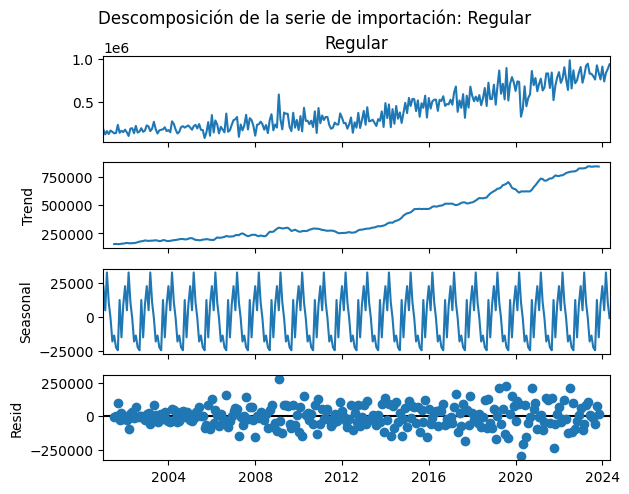

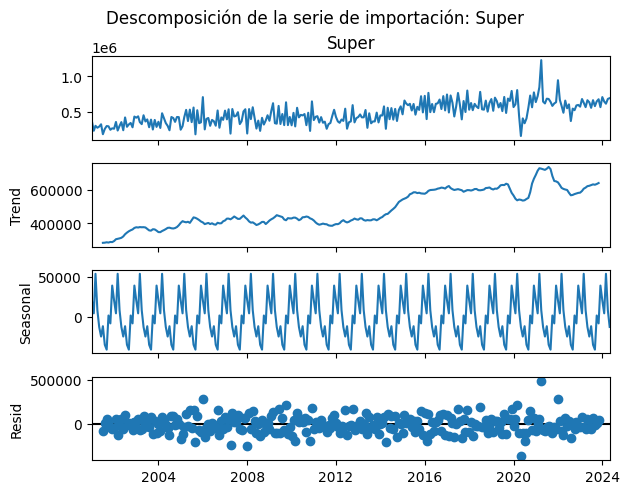

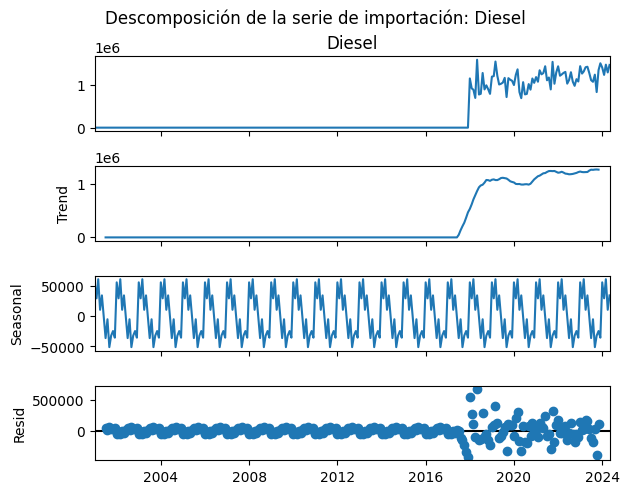

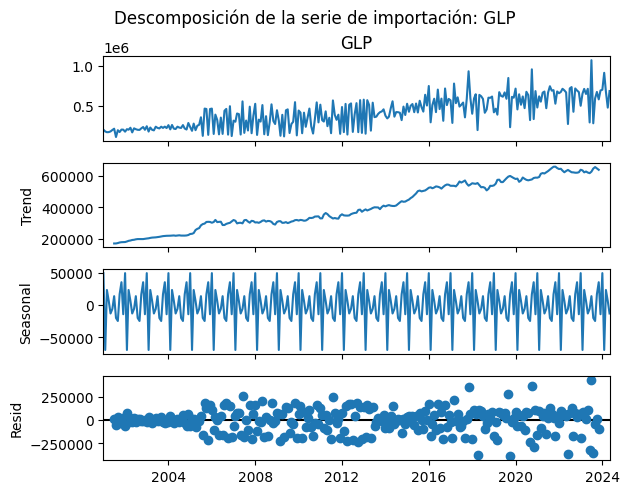

In [68]:
# Verificar si hay valores faltantes en importacion_df
missing_values_importacion = importacion_df[['Regular', 'Super', 'Diesel', 'GLP']].isna().sum()
print("Valores faltantes en importacion_df antes de la interpolación:")
print(missing_values_importacion)

# Interpolar valores faltantes en importacion_df
importacion_df[['Regular', 'Super', 'Diesel', 'GLP']] = importacion_df[['Regular', 'Super', 'Diesel', 'GLP']].interpolate()

# Verificar nuevamente los valores faltantes en importacion_df
missing_values_after_interpolation_importacion = importacion_df[['Regular', 'Super', 'Diesel', 'GLP']].isna().sum()
print("Valores faltantes en importacion_df después de la interpolación:")
print(missing_values_after_interpolation_importacion)

# Descomposición de la serie de importación
for col in ['Regular', 'Super', 'Diesel', 'GLP']:
    result = seasonal_decompose(importacion_df.set_index('Fecha')[col], model='additive', period=12)
    result.plot()
    plt.suptitle(f'Descomposición de la serie de importación: {col}', y=1.02)
    plt.show()

Serie de Importación de Combustibles: Regular
La serie de importación de combustibles regular muestra una tendencia ascendente constante desde el año 2000 hasta 2024, indicando un aumento gradual en la importación de este tipo de combustible. Además, presenta un patrón estacional anual claro, lo que sugiere fluctuaciones predecibles en ciertos períodos del año. Los residuos están distribuidos aleatoriamente alrededor de cero, indicando que la descomposición captura bien la estructura de la serie y que los componentes de tendencia y estacionalidad explican la mayor parte de la variabilidad observada.

Serie de Importación de Combustibles: Super
La serie de importación de combustibles super también presenta una tendencia ascendente, aunque con una ligera caída alrededor del año 2020, lo que sugiere un incremento en la importación con una variación reciente. La estacionalidad es clara y se repite anualmente, indicando fluctuaciones consistentes en diferentes períodos del año. Los residuos no muestran un patrón definido y están distribuidos alrededor de cero, lo que sugiere que los componentes de tendencia y estacionalidad representan bien la serie de tiempo.

Serie de Importación de Combustibles: Diesel
La tendencia en la serie de importación de diesel muestra un aumento significativo alrededor del año 2016, manteniéndose alta hasta 2024, lo que señala un cambio drástico en la importación posiblemente debido a variaciones en la demanda o políticas. La serie presenta una estacionalidad anual clara y consistente, indicando patrones recurrentes en la importación en diferentes épocas del año. Los residuos son más dispersos después del cambio en la tendencia en 2016, pero no presentan un patrón claro, sugiriendo la presencia de factores adicionales que afectan la serie.

Serie de Importación de Combustibles: GLP
La serie de importación de GLP muestra una tendencia ascendente constante desde el año 2000 hasta 2024, reflejando un aumento sostenido en la importación de este combustible. La estacionalidad anual es clara, indicando fluctuaciones regulares en diferentes momentos del año. Los residuos están distribuidos alrededor de cero sin un patrón definido, lo que sugiere que la descomposición captura adecuadamente la estructura de la serie, y los componentes de tendencia y estacionalidad explican la mayor parte de la variabilidad observada.

El análisis de las series de tiempo de la importación de combustibles regular, super, diesel y GLP revela patrones importantes de tendencia y estacionalidad en cada tipo de combustible. Todas las series muestran una tendencia ascendente, indicando un aumento sostenido en la importación de combustibles a lo largo del tiempo. Este incremento puede estar relacionado con el crecimiento económico, una mayor demanda de energía y cambios en las políticas energéticas. Además, todas las series presentan una estacionalidad anual clara, lo que sugiere que existen patrones predecibles en la importación de combustibles en diferentes épocas del año, posiblemente debido a fluctuaciones en la demanda estacional, mantenimiento de infraestructuras y factores económicos cíclicos. Los residuos distribuidos aleatoriamente alrededor de cero en todas las series indican que los componentes de tendencia y estacionalidad explican adecuadamente la mayor parte de la variabilidad observada. Este conocimiento es crucial para la planificación y gestión eficiente de la importación de combustibles, permitiendo prever demandas futuras y ajustar las políticas energéticas en consecuencia.

Valores faltantes antes de la interpolación:
Regular    7
Super      7
Diesel     7
dtype: int64
Valores faltantes después de la interpolación:
Regular    0
Super      0
Diesel     0
dtype: int64


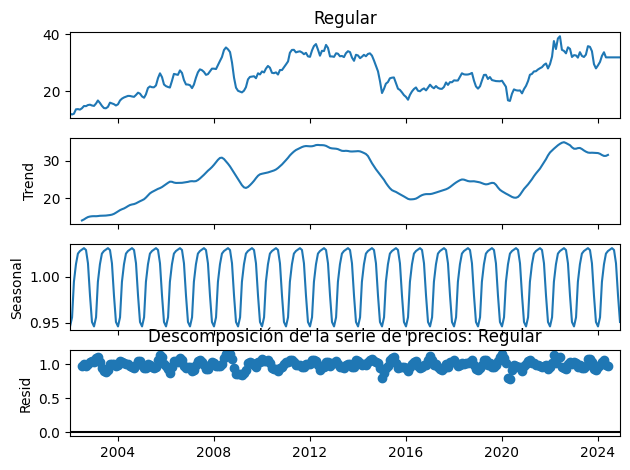

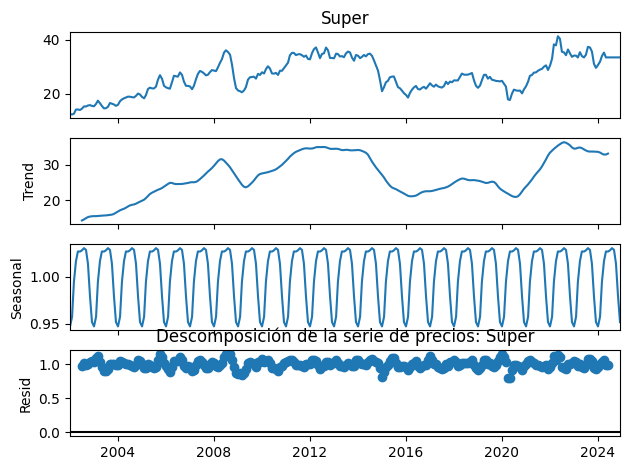

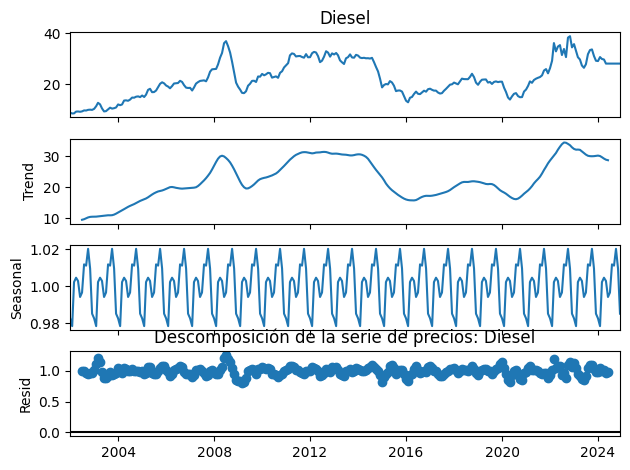

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Verificar si hay valores faltantes
missing_values = precios_df[['Regular', 'Super', 'Diesel']].isna().sum()
print("Valores faltantes antes de la interpolación:")
print(missing_values)

# Interpolar valores faltantes
precios_df[['Regular', 'Super', 'Diesel']] = precios_df[['Regular', 'Super', 'Diesel']].interpolate()

# Verificar nuevamente los valores faltantes
missing_values_after_interpolation = precios_df[['Regular', 'Super', 'Diesel']].isna().sum()
print("Valores faltantes después de la interpolación:")
print(missing_values_after_interpolation)

# Descomposición de la serie de precios
for col in ['Regular', 'Super', 'Diesel']:
    result = seasonal_decompose(precios_df.set_index('Fecha')[col], model='multiplicative', period=12)
    result.plot()
    plt.title(f'Descomposición de la serie de precios: {col}')
    plt.show()


Serie de Precios de Combustibles: Regular
La serie de precios de combustibles regular muestra una tendencia ascendente hasta aproximadamente el año 2014, seguida de una disminución y luego una estabilización con ligeras fluctuaciones hasta 2024. Esto indica que, aunque los precios han tenido periodos de aumento, también han experimentado caídas y estabilidad reciente. La serie presenta una estacionalidad anual clara, con fluctuaciones predecibles que se repiten cada año. Los residuos están distribuidos aleatoriamente alrededor de cero, lo que sugiere que los componentes de tendencia y estacionalidad explican adecuadamente la variabilidad observada en los precios.

Serie de Precios de Combustibles: Super
La serie de precios de combustibles super también presenta una tendencia ascendente hasta alrededor del año 2014, seguida de una estabilización con fluctuaciones hasta 2024. Esto implica que, al igual que los precios de combustibles regular, los precios de combustibles super han experimentado aumentos, seguidos de periodos de estabilidad y fluctuaciones menores. La estacionalidad anual es clara y consistente, indicando patrones recurrentes en los precios en diferentes momentos del año. Los residuos están distribuidos alrededor de cero sin un patrón definido, lo que sugiere que la descomposición captura bien la estructura de la serie.

Serie de Precios de Combustibles: Diesel
La serie de precios de combustibles diesel muestra una tendencia ascendente hasta alrededor del año 2008, seguida de fluctuaciones con aumentos y disminuciones significativas hasta 2024. Esto refleja que los precios de combustibles diesel han tenido periodos de incremento, así como de volatilidad considerable. La estacionalidad anual es clara, con patrones predecibles en los precios que se repiten cada año. Los residuos están distribuidos alrededor de cero sin un patrón claro, lo que indica que la descomposición captura adecuadamente la variabilidad en los precios de diesel.

Conclusión General
El análisis de las series de tiempo de los precios de combustibles regular, super y diesel revela patrones importantes de tendencia y estacionalidad en cada tipo de combustible. Todas las series muestran una tendencia ascendente en algún periodo, seguido de fluctuaciones y estabilidad en años recientes. La estacionalidad anual es clara en todas las series, indicando que existen patrones predecibles en los precios a lo largo del año. Los residuos distribuidos aleatoriamente alrededor de cero sugieren que los componentes de tendencia y estacionalidad explican bien la variabilidad observada. Este análisis es crucial para entender las dinámicas de precios de los combustibles y para la planificación y gestión eficiente en el sector energético, permitiendo prever cambios en los precios y ajustar estrategias en consecuencia.

In [70]:
from statsmodels.tsa.stattools import adfuller
#CONSUMO
print('-----CONSUMO-----')
# Prueba de Dickey-Fuller Aumentada
result1_1 = adfuller(consumo_df['Regular'])
print('-----Regular-----')
print('ADF Statistic:', result1_1[0])
print('p-value:', result1_1[1])

# Prueba de Dickey-Fuller Aumentada
result1_2 = adfuller(consumo_df['Super'])
print('-----Super-----')
print('ADF Statistic:', result1_2[0])
print('p-value:', result1_2[1])

# Prueba de Dickey-Fuller Aumentada
result1_3 = adfuller(consumo_df['Diesel'])
print('-----Diesel-----')
print('ADF Statistic:', result1_3[0])
print('p-value:', result1_3[1])

# Prueba de Dickey-Fuller Aumentada
result1_4 = adfuller(consumo_df['GLP'])
print('-----GLP-----')
print('ADF Statistic:', result1_4[0])
print('p-value:', result1_4[1])
print('-----------------')
#IMPORTACIONES
print('-----IMPORTACIONES-----')
# Prueba de Dickey-Fuller Aumentada
result2_1 = adfuller(importacion_df['Regular'])
print('-----Regular-----')
print('ADF Statistic:', result2_1[0])
print('p-value:', result2_1[1])

# Prueba de Dickey-Fuller Aumentada
result2_2 = adfuller(importacion_df['Super'])
print('-----Super-----')
print('ADF Statistic:', result2_2[0])
print('p-value:', result2_2[1])

# Prueba de Dickey-Fuller Aumentada
result2_3 = adfuller(importacion_df['Diesel'])
print('-----Diesel-----')
print('ADF Statistic:', result2_3[0])
print('p-value:', result2_3[1])

# Prueba de Dickey-Fuller Aumentada
result2_4 = adfuller(importacion_df['GLP'])
print('-----GLP-----')
print('ADF Statistic:', result2_4[0])
print('p-value:', result2_4[1])
print('-----------------')
#PRECIOS
print('-----PRECIOS-----')
# Prueba de Dickey-Fuller Aumentada
result3_1 = adfuller(precios_df['Regular'])
print('-----Regular-----')
print('ADF Statistic:', result3_1[0])
print('p-value:', result3_1[1])

# Prueba de Dickey-Fuller Aumentada
result3_2 = adfuller(precios_df['Super'])
print('-----Super-----')
print('ADF Statistic:', result3_2[0])
print('p-value:', result3_2[1])

# Prueba de Dickey-Fuller Aumentada
result3_3 = adfuller(precios_df['Diesel'])
print('-----Diesel-----')
print('ADF Statistic:', result3_3[0])
print('p-value:', result3_3[1])



-----CONSUMO-----
-----Regular-----
ADF Statistic: 2.71241364923967
p-value: 0.9990875733155129
-----Super-----
ADF Statistic: -0.6787829834154686
p-value: 0.8521689503946178
-----Diesel-----
ADF Statistic: -0.41563265649760117
p-value: 0.9074557821510758
-----GLP-----
ADF Statistic: 0.8662148782601513
p-value: 0.9926331955934964
-----------------
-----IMPORTACIONES-----
-----Regular-----
ADF Statistic: 0.8288289928204919
p-value: 0.992087554110633
-----Super-----
ADF Statistic: -2.932952845797836
p-value: 0.04164803728027597
-----Diesel-----
ADF Statistic: 0.07713436090655612
p-value: 0.9644648276674772
-----GLP-----
ADF Statistic: -0.40230602414006694
p-value: 0.9097130413332868
-----------------
-----PRECIOS-----
-----Regular-----
ADF Statistic: -2.2928205623137283
p-value: 0.17429393933396736
-----Super-----
ADF Statistic: -2.253383222349678
p-value: 0.18744362609744886
-----Diesel-----
ADF Statistic: -2.52406322019542
p-value: 0.10972871576301296


**Series de Tiempo que No Son Estacionarias**

La mayoría de las series de tiempo analizadas no son estacionarias en media ni en varianza. Estas incluyen el consumo de combustibles (Regular, Super, Diesel, GLP), las importaciones de combustibles (Regular, Diesel, GLP) y los precios de combustibles (Regular, Super, Diesel). Los resultados de la Prueba de Dickey-Fuller Aumentada para estas series muestran p-valores significativamente mayores a 0.05, lo que indica que no se puede rechazar la hipótesis nula de no estacionariedad. En otras palabras, estas series presentan una raíz unitaria, lo que implica que tienen una tendencia o un patrón de crecimiento a lo largo del tiempo. Para poder analizar y modelar correctamente estas series, es necesario aplicar diferenciación para eliminar la raíz unitaria y hacer que las series se vuelvan estacionarias. La no estacionariedad puede ser debida a cambios en la demanda, variaciones estacionales o políticas energéticas fluctuantes, que introducen tendencias y patrones a largo plazo en los datos.

**Serie de Tiempo que Sí Es Estacionaria**

La serie de importaciones de combustibles Super es la única que resultó ser estacionaria en media. El resultado de la Prueba de Dickey-Fuller Aumentada para esta serie muestra un p-value de 0.042, menor que 0.05, lo que permite rechazar la hipótesis nula de no estacionariedad. Esto significa que la serie no tiene una raíz unitaria y que sus propiedades estadísticas, como la media y la varianza, son constantes en el tiempo. La estacionariedad en esta serie puede indicar que, a pesar de posibles fluctuaciones a corto plazo, el proceso subyacente que genera las importaciones de combustibles Super es estable y predecible a largo plazo. Esto facilita el análisis y la modelización de la serie para fines de pronóstico y toma de decisiones.

In [71]:
# Diferenciación CONSUMO
consumo_df['Regular_diff'] = consumo_df['Regular'].diff()
consumo_df['Super_diff'] = consumo_df['Super'].diff()
consumo_df['Diesel_diff'] = consumo_df['Diesel'].diff()
consumo_df['GLP_diff'] = consumo_df['GLP'].diff()

# Diferenciación IMPORTACIONES
importacion_df['Regular_diff'] = importacion_df['Regular'].diff()
importacion_df['Super_diff'] = importacion_df['Super'].diff()
importacion_df['Diesel_diff'] = importacion_df['Diesel'].diff()
importacion_df['GLP_diff'] = importacion_df['GLP'].diff()

# Diferenciación PRECIOS
precios_df['Regular_diff'] = precios_df['Regular'].diff()
precios_df['Super_diff'] = precios_df['Super'].diff()
precios_df['Diesel_diff'] = precios_df['Diesel'].diff()


ANÁLISIS DE CONSUMO

Consumo - Regular


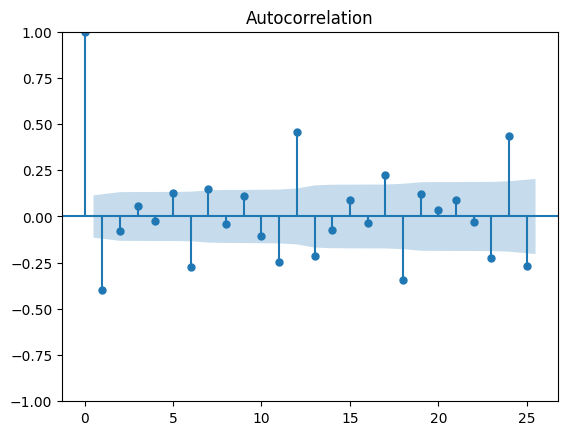

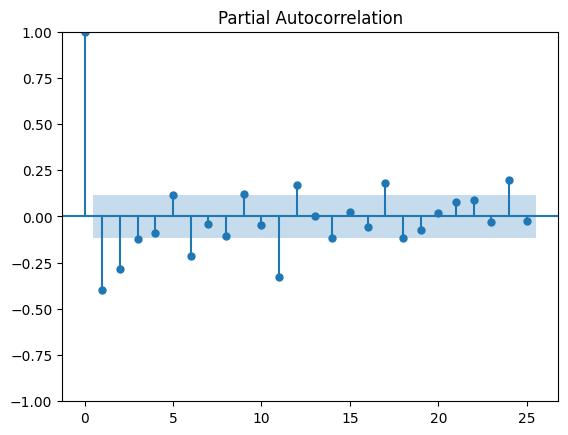

                               SARIMAX Results                                
Dep. Variable:                Regular   No. Observations:                  293
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3465.479
Date:                Sat, 03 Aug 2024   AIC                           6936.959
Time:                        22:44:26   BIC                           6947.989
Sample:                             0   HQIC                          6941.377
                                - 293                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0856      0.074      1.153      0.249      -0.060       0.231
ma.L1         -0.5861      0.068     -8.668      0.000      -0.719      -0.454
sigma2      1.173e+09   6.29e-12   1.87e+20      0.0

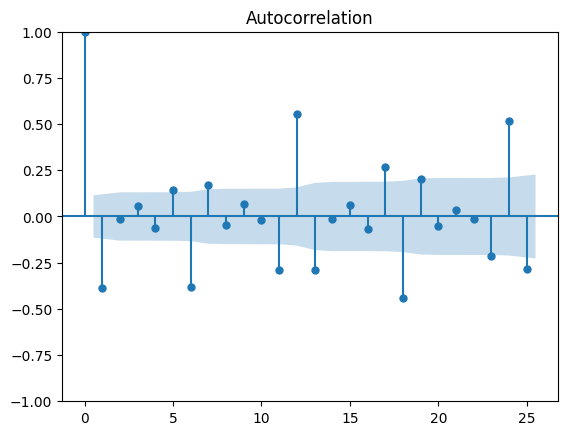

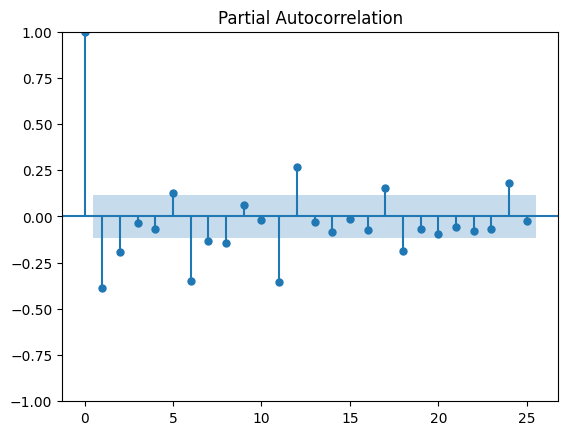

                               SARIMAX Results                                
Dep. Variable:                  Super   No. Observations:                  293
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3501.875
Date:                Sat, 03 Aug 2024   AIC                           7009.750
Time:                        22:44:26   BIC                           7020.781
Sample:                             0   HQIC                          7014.169
                                - 293                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3753      0.062      6.017      0.000       0.253       0.498
ma.L1         -0.7725      0.051    -15.286      0.000      -0.872      -0.673
sigma2      1.499e+09   1.58e-11    9.5e+19      0.0

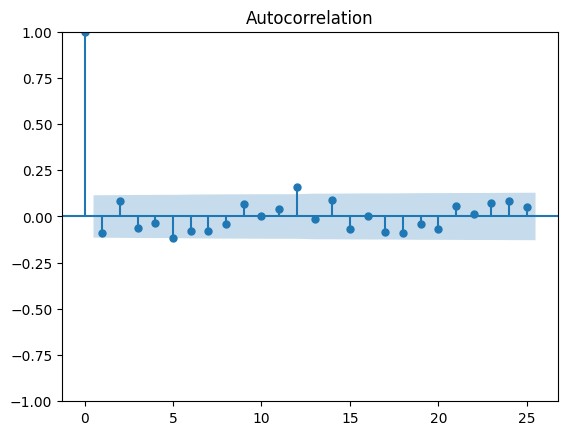

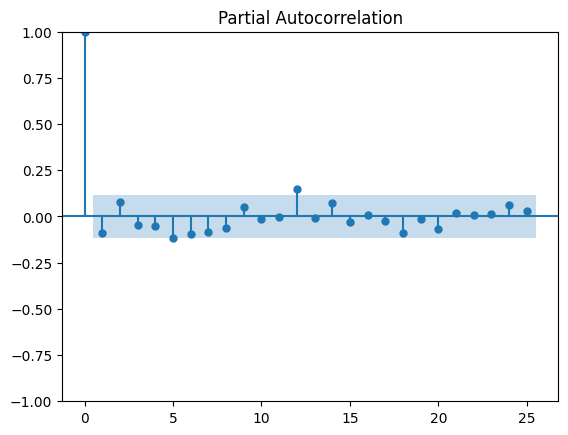

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


                               SARIMAX Results                                
Dep. Variable:                 Diesel   No. Observations:                  293
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3719.661
Date:                Sat, 03 Aug 2024   AIC                           7445.321
Time:                        22:44:27   BIC                           7456.352
Sample:                             0   HQIC                          7449.740
                                - 293                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6766      0.273     -2.479      0.013      -1.212      -0.142
ma.L1          0.5871      0.303      1.937      0.053      -0.007       1.181
sigma2      6.879e+09   6.76e-12   1.02e+21      0.0

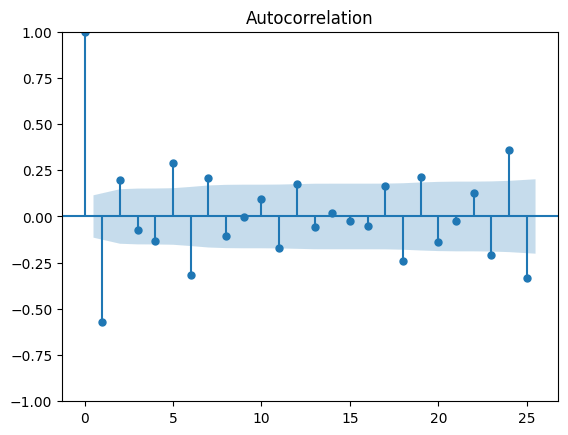

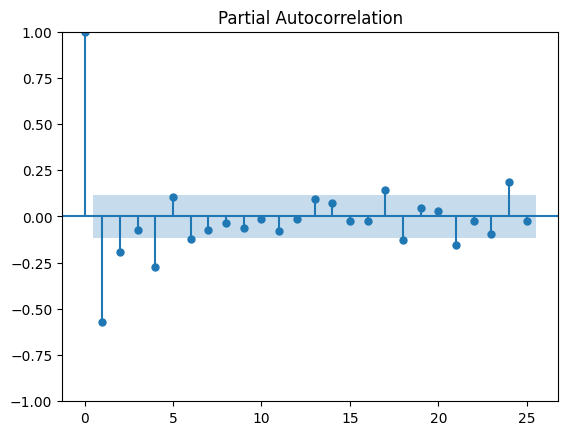

                               SARIMAX Results                                
Dep. Variable:                    GLP   No. Observations:                  293
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3289.120
Date:                Sat, 03 Aug 2024   AIC                           6584.239
Time:                        22:44:28   BIC                           6595.269
Sample:                             0   HQIC                          6588.657
                                - 293                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2169      0.054     -3.999      0.000      -0.323      -0.111
ma.L1         -0.3793      0.065     -5.807      0.000      -0.507      -0.251
sigma2      3.347e+08   2.56e-11   1.31e+19      0.0

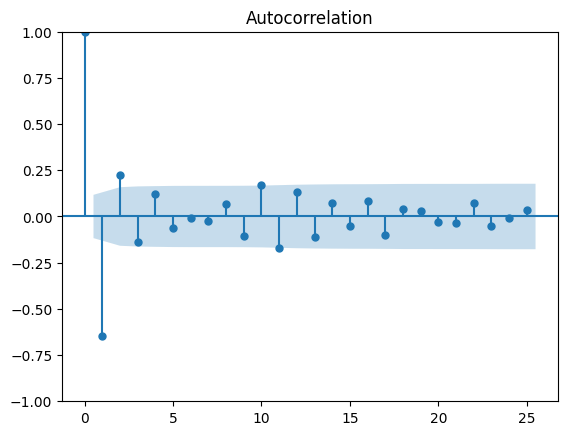

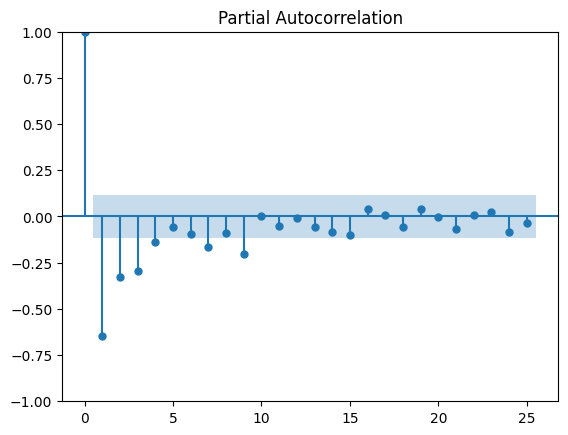

                               SARIMAX Results                                
Dep. Variable:                Regular   No. Observations:                  281
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3594.508
Date:                Sat, 03 Aug 2024   AIC                           7195.016
Time:                        22:44:29   BIC                           7205.920
Sample:                             0   HQIC                          7199.390
                                - 281                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2794      0.058     -4.849      0.000      -0.392      -0.166
ma.L1         -0.7740      0.044    -17.772      0.000      -0.859      -0.689
sigma2      8.872e+09   1.69e-12   5.24e+21      0.0

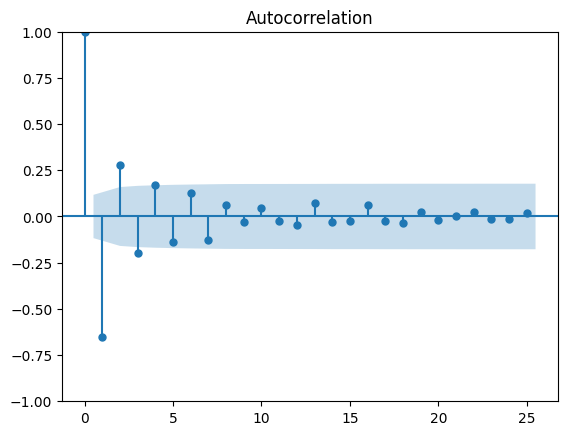

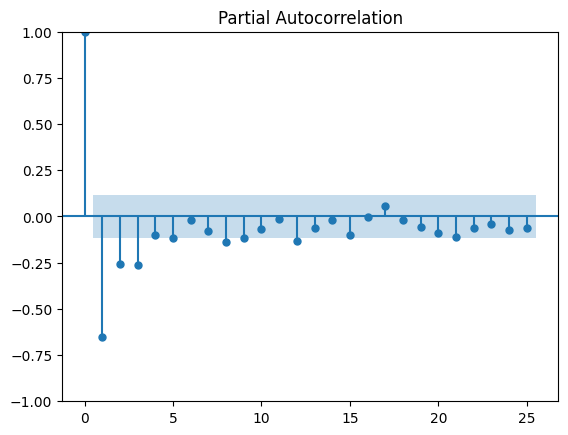

                               SARIMAX Results                                
Dep. Variable:                  Super   No. Observations:                  281
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3649.777
Date:                Sat, 03 Aug 2024   AIC                           7305.554
Time:                        22:44:29   BIC                           7316.459
Sample:                             0   HQIC                          7309.928
                                - 281                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2275      0.062     -3.650      0.000      -0.350      -0.105
ma.L1         -0.7746      0.034    -22.656      0.000      -0.842      -0.708
sigma2      1.302e+10   1.99e-12   6.54e+21      0.0

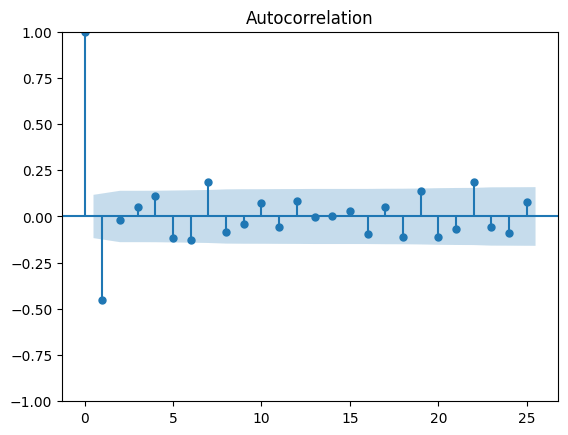

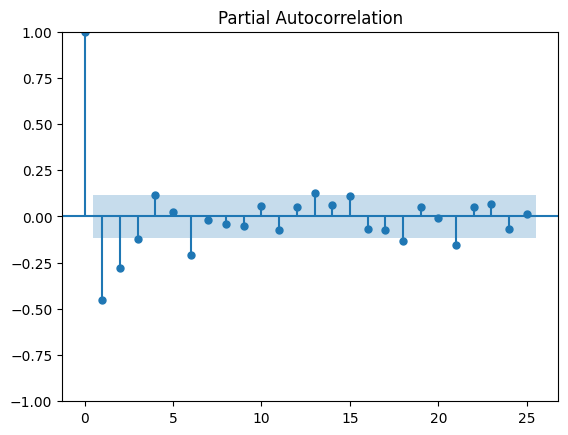

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


                               SARIMAX Results                                
Dep. Variable:                 Diesel   No. Observations:                  281
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3709.252
Date:                Sat, 03 Aug 2024   AIC                           7424.504
Time:                        22:44:30   BIC                           7435.408
Sample:                             0   HQIC                          7428.877
                                - 281                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1134      0.052     -2.176      0.030      -0.215      -0.011
ma.L1         -0.4804      0.050     -9.600      0.000      -0.578      -0.382
sigma2      1.881e+10   2.65e-12   7.09e+21      0.0

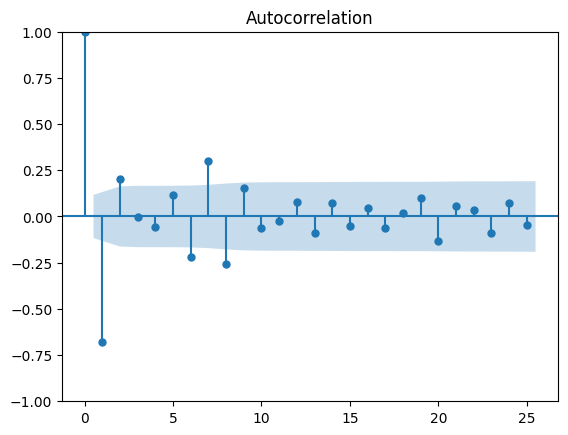

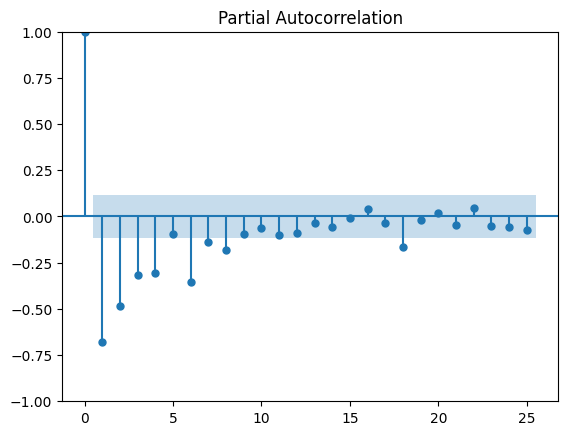

                               SARIMAX Results                                
Dep. Variable:                    GLP   No. Observations:                  281
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3678.990
Date:                Sat, 03 Aug 2024   AIC                           7363.980
Time:                        22:44:31   BIC                           7374.884
Sample:                             0   HQIC                          7368.354
                                - 281                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4535      0.063     -7.233      0.000      -0.576      -0.331
ma.L1         -0.8852      0.035    -25.102      0.000      -0.954      -0.816
sigma2       1.82e+10   3.03e-13      6e+22      0.0

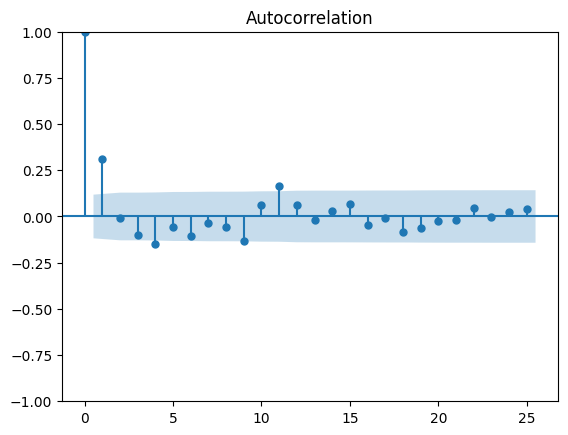

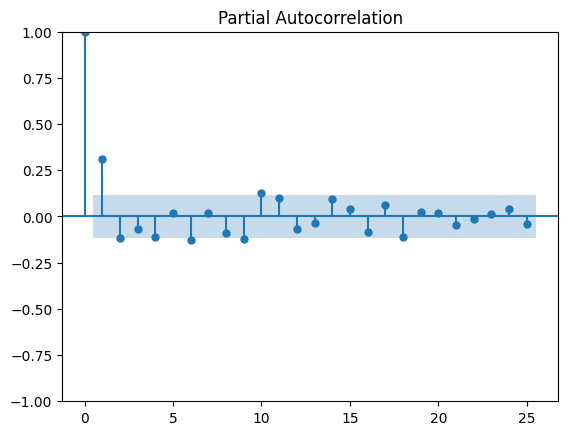

                               SARIMAX Results                                
Dep. Variable:                Regular   No. Observations:                  276
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -469.191
Date:                Sat, 03 Aug 2024   AIC                            944.382
Time:                        22:44:31   BIC                            955.232
Sample:                             0   HQIC                           948.736
                                - 276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0443      0.116      0.382      0.702      -0.183       0.271
ma.L1          0.2989      0.106      2.821      0.005       0.091       0.507
sigma2         1.7753      0.107     16.561      0.0

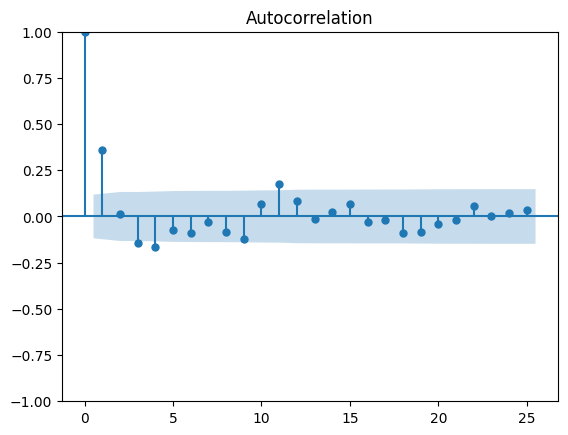

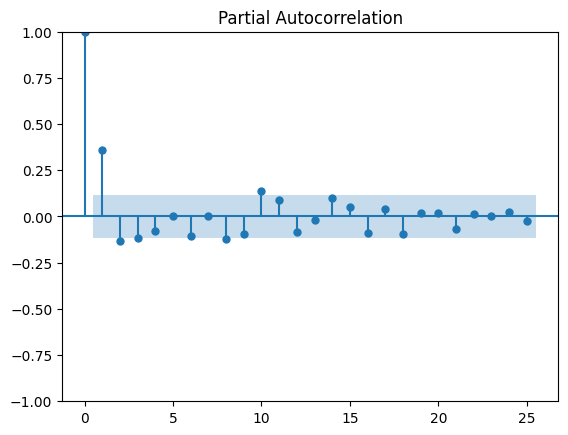

                               SARIMAX Results                                
Dep. Variable:                  Super   No. Observations:                  276
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -459.494
Date:                Sat, 03 Aug 2024   AIC                            924.987
Time:                        22:44:32   BIC                            935.838
Sample:                             0   HQIC                           929.342
                                - 276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1668      0.117      1.421      0.155      -0.063       0.397
ma.L1          0.2301      0.110      2.098      0.036       0.015       0.445
sigma2         1.6542      0.117     14.116      0.0

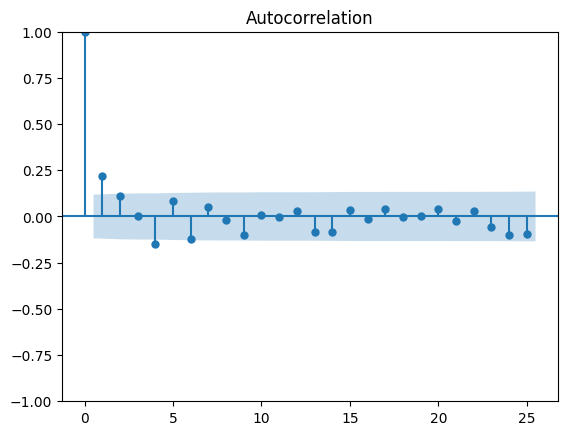

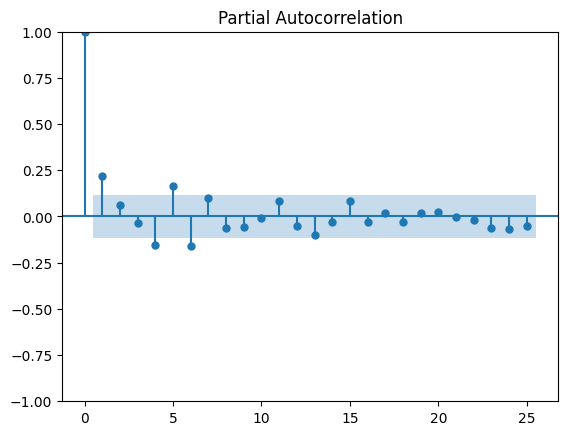

                               SARIMAX Results                                
Dep. Variable:                 Diesel   No. Observations:                  276
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -482.942
Date:                Sat, 03 Aug 2024   AIC                            971.883
Time:                        22:44:33   BIC                            982.734
Sample:                             0   HQIC                           976.238
                                - 276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3874      0.162      2.390      0.017       0.070       0.705
ma.L1         -0.1759      0.173     -1.015      0.310      -0.516       0.164
sigma2         1.9625      0.090     21.893      0.0

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# Función auxiliar para plot ACF y PACF y ajustar el modelo ARIMA
def analyze_series(data, column, title_prefix):
    print(f"\n{title_prefix} - {column}")

    # Gráfico de autocorrelación y autocorrelación parcial
    plot_acf(data[f'{column}_diff'].dropna())
    plot_pacf(data[f'{column}_diff'].dropna())
    plt.show()

    # Modelo ARIMA
    model = ARIMA(data[column], order=(1, 1, 1))
    model_fit = model.fit()
    print(model_fit.summary())

# ANÁLISIS DE CONSUMO
print("ANÁLISIS DE CONSUMO")
for col in ['Regular', 'Super', 'Diesel', 'GLP']:
    analyze_series(consumo_df, col, "Consumo")

# ANÁLISIS DE IMPORTACIONES
print("\nANÁLISIS DE IMPORTACIONES")
for col in ['Regular', 'Super', 'Diesel', 'GLP']:
    analyze_series(importacion_df, col, "Importaciones")

# ANÁLISIS DE PRECIOS
print("\nANÁLISIS DE PRECIOS")
for col in ['Regular', 'Super', 'Diesel']:
    analyze_series(precios_df, col, "Precios")

In [73]:
from statsmodels.tsa.arima.model import ARIMA

# Crear y ajustar los modelos ARIMA
model_1_1 = ARIMA(precios_df['Regular'], order=(1, 1, 1))
model_1_1_fit = model_1_1.fit()

model_2_1 = ARIMA(precios_df['Regular'], order=(2, 1, 1))
model_2_1_fit = model_2_1.fit()

model_3_1 = ARIMA(precios_df['Regular'], order=(1, 1, 2))
model_3_1_fit = model_3_1.fit()

# Comparar AIC y BIC
models_comparison_regular = pd.DataFrame({
    'Model': ['ARIMA(1,1,1)', 'ARIMA(2,1,1)', 'ARIMA(1,1,2)'],
    'AIC': [model_1_1_fit.aic, model_2_1_fit.aic, model_3_1_fit.aic],
    'BIC': [model_1_1_fit.bic, model_2_1_fit.bic, model_3_1_fit.bic]
})

# Crear y ajustar los modelos ARIMA
model_1_2 = ARIMA(precios_df['Super'], order=(1, 1, 1))
model_1_2_fit = model_1_2.fit()

model_2_2 = ARIMA(precios_df['Super'], order=(2, 1, 1))
model_2_2_fit = model_2_2.fit()

model_3_2 = ARIMA(precios_df['Super'], order=(1, 1, 2))
model_3_2_fit = model_3_2.fit()

# Comparar AIC y BIC
models_comparison_super = pd.DataFrame({
    'Model': ['ARIMA(1,1,1)', 'ARIMA(2,1,1)', 'ARIMA(1,1,2)'],
    'AIC': [model_1_2_fit.aic, model_2_2_fit.aic, model_3_2_fit.aic],
    'BIC': [model_1_2_fit.bic, model_2_2_fit.bic, model_3_2_fit.bic]
})

# Crear y ajustar los modelos ARIMA
model_1_3 = ARIMA(precios_df['Diesel'], order=(1, 1, 1))
model_1_3_fit = model_1_3.fit()

model_2_3 = ARIMA(precios_df['Diesel'], order=(2, 1, 1))
model_2_3_fit = model_2_3.fit()

model_3_3 = ARIMA(precios_df['Diesel'], order=(1, 1, 2))
model_3_3_fit = model_3_3.fit()

# Comparar AIC y BIC
models_comparison_diesel = pd.DataFrame({
    'Model': ['ARIMA(1,1,1)', 'ARIMA(2,1,1)', 'ARIMA(1,1,2)'],
    'AIC': [model_1_3_fit.aic, model_2_3_fit.aic, model_3_3_fit.aic],
    'BIC': [model_1_3_fit.bic, model_2_3_fit.bic, model_3_3_fit.bic]
})

models_comparison_regular, models_comparison_super, models_comparison_diesel



(          Model         AIC         BIC
 0  ARIMA(1,1,1)  944.381807  955.232120
 1  ARIMA(2,1,1)  940.878287  955.345372
 2  ARIMA(1,1,2)  943.608622  958.075706,
           Model         AIC         BIC
 0  ARIMA(1,1,1)  924.987299  935.837613
 1  ARIMA(2,1,1)  918.785695  933.252779
 2  ARIMA(1,1,2)  925.847469  940.314553,
           Model         AIC         BIC
 0  ARIMA(1,1,1)  971.883425  982.733738
 1  ARIMA(2,1,1)  967.481077  981.948161
 2  ARIMA(1,1,2)  972.234974  986.702059)

In [74]:
pip install prophet


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzciywk6b/o4c_hnuz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzciywk6b/89jazoyk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58868', 'data', 'file=/tmp/tmpzciywk6b/o4c_hnuz.json', 'init=/tmp/tmpzciywk6b/89jazoyk.json', 'output', 'file=/tmp/tmpzciywk6b/prophet_modelb2b6zixh/prophet_model-20240803224438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:44:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:44:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

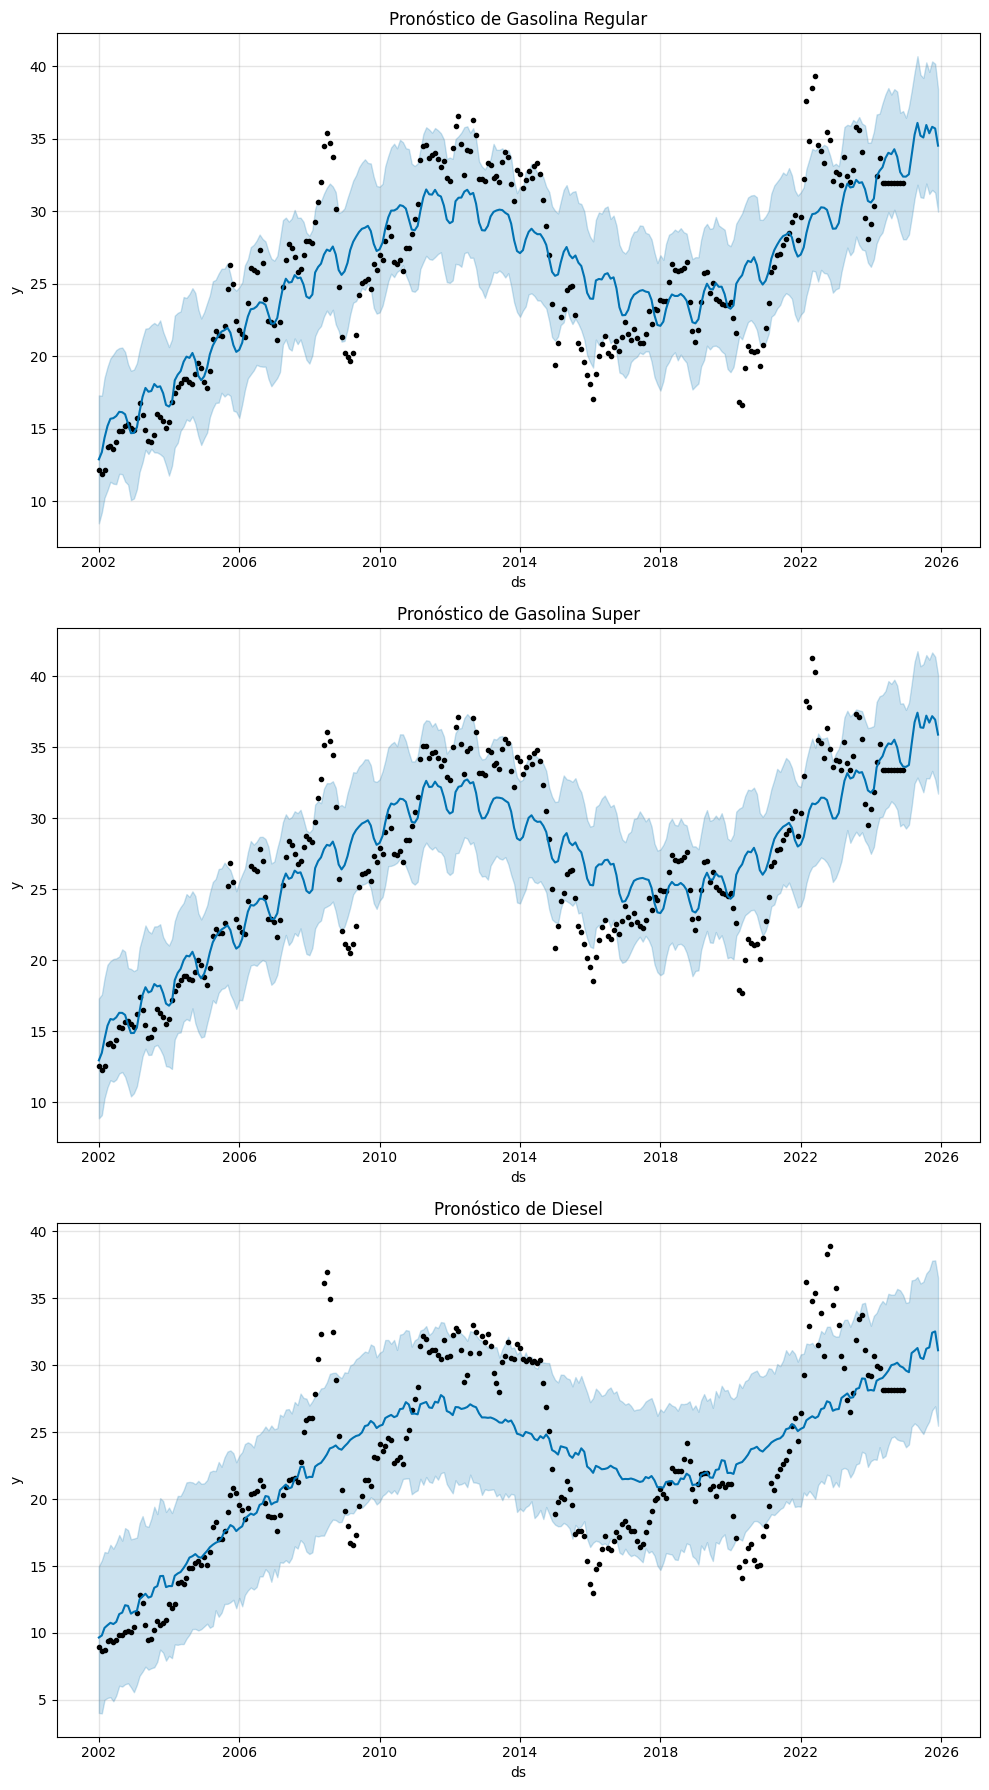

In [75]:
from prophet import Prophet

# Preparar y predecir con Prophet para Regular
prophet_df_regular = precios_df[['Fecha', 'Regular']].rename(columns={'Fecha': 'ds', 'Regular': 'y'})
prophet_model_regular = Prophet()
prophet_model_regular.fit(prophet_df_regular)
future_regular = prophet_model_regular.make_future_dataframe(periods=12, freq='M')
forecast_regular = prophet_model_regular.predict(future_regular)

# Preparar y predecir con Prophet para Super
prophet_df_super = precios_df[['Fecha', 'Super']].rename(columns={'Fecha': 'ds', 'Super': 'y'})
prophet_model_super = Prophet()
prophet_model_super.fit(prophet_df_super)
future_super = prophet_model_super.make_future_dataframe(periods=12, freq='M')
forecast_super = prophet_model_super.predict(future_super)

# Preparar y predecir con Prophet para Diesel
prophet_df_diesel = precios_df[['Fecha', 'Diesel']].rename(columns={'Fecha': 'ds', 'Diesel': 'y'})
prophet_model_diesel = Prophet()
prophet_model_diesel.fit(prophet_df_diesel)
future_diesel = prophet_model_diesel.make_future_dataframe(periods=12, freq='M')
forecast_diesel = prophet_model_diesel.predict(future_diesel)

# Graficar pronósticos
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Regular
prophet_model_regular.plot(forecast_regular, ax=axes[0])
axes[0].set_title('Pronóstico de Gasolina Regular')

# Super
prophet_model_super.plot(forecast_super, ax=axes[1])
axes[1].set_title('Pronóstico de Gasolina Super')

# Diesel
prophet_model_diesel.plot(forecast_diesel, ax=axes[2])
axes[2].set_title('Pronóstico de Diesel')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

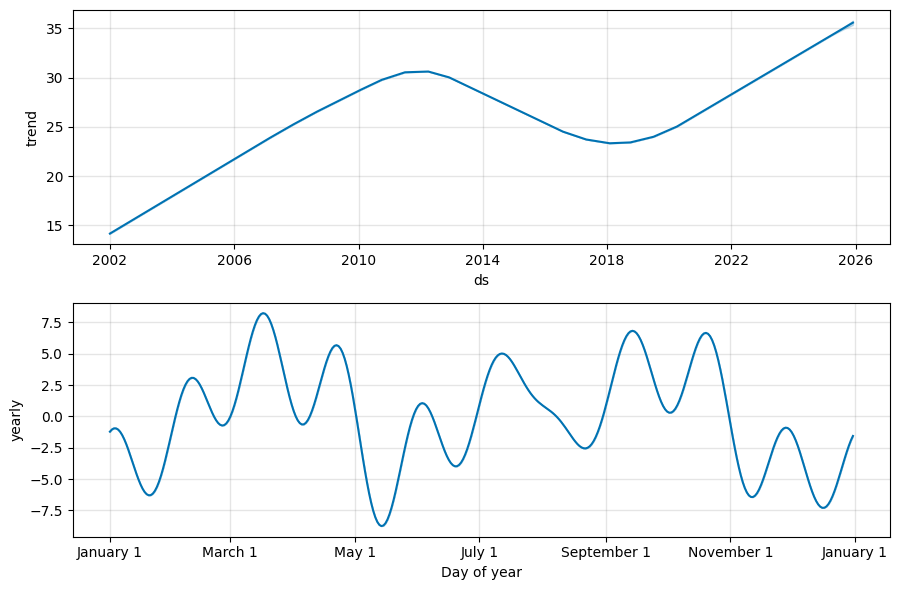

In [76]:
# Regular
prophet_model_regular.plot_components(forecast_regular).show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

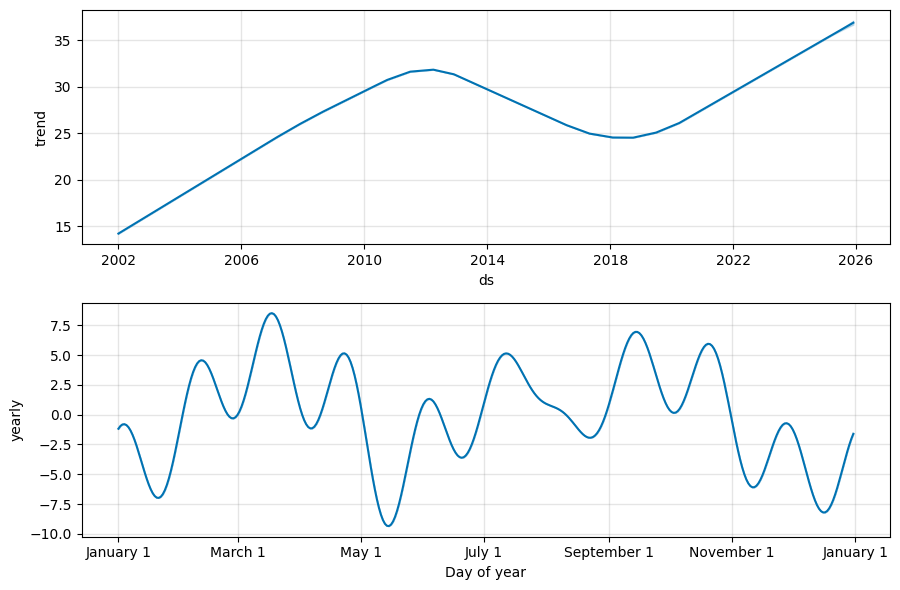

In [77]:
# Super
prophet_model_super.plot_components(forecast_super).show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

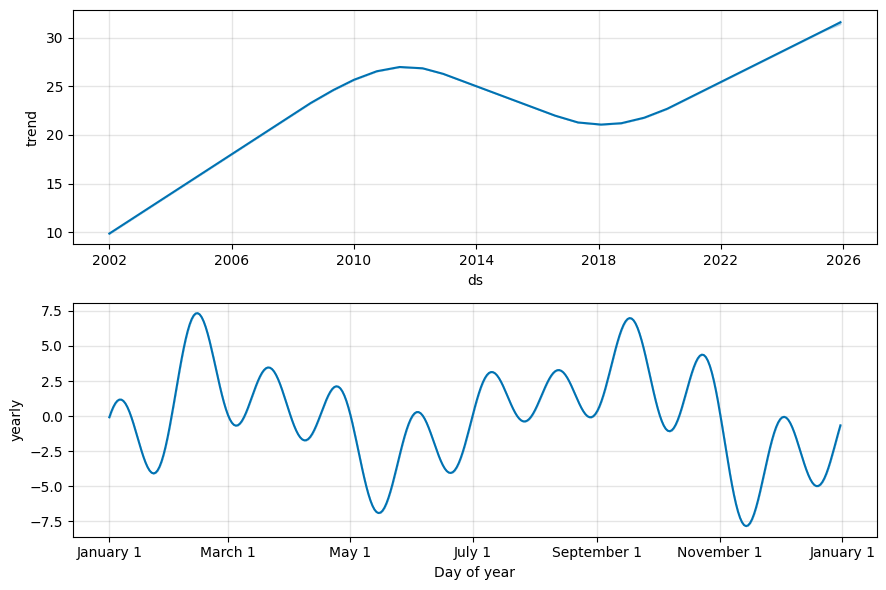

In [78]:
# Diesel
prophet_model_diesel.plot_components(forecast_diesel).show()

In [79]:
from sklearn.metrics import mean_squared_error

# Regular
# Pronóstico ARIMA para Regular
arima_forecast_regular = model_3_1_fit.forecast(steps=12)
# Seleccionar las últimas 12 filas de 'Regular' para el cálculo del RMSE
consumo_regular_last_12 = precios_df['Regular'].iloc[-12:].values
arima_rmse_regular = mean_squared_error(consumo_regular_last_12, arima_forecast_regular, squared=False)
print('Regular - ARIMA RMSE:', arima_rmse_regular)

# Pronóstico Prophet para Regular
prophet_forecast_regular = forecast_regular.set_index('ds').iloc[-12:]['yhat']
prophet_forecast_values_regular = prophet_forecast_regular.values
# Asegurarse de que las predicciones y los valores reales tienen el mismo tamaño
assert len(consumo_regular_last_12) == len(prophet_forecast_values_regular), "Inconsistent number of samples between actual and forecasted values"
prophet_rmse_regular = mean_squared_error(consumo_regular_last_12, prophet_forecast_values_regular, squared=False)
print('Regular - Prophet RMSE:', prophet_rmse_regular)

# Super
# Pronóstico ARIMA para Super
arima_forecast_super = model_2_2_fit.forecast(steps=12)
# Seleccionar las últimas 12 filas de 'Super' para el cálculo del RMSE
consumo_super_last_12 = precios_df['Super'].iloc[-12:].values
arima_rmse_super = mean_squared_error(consumo_super_last_12, arima_forecast_super, squared=False)
print('Super - ARIMA RMSE:', arima_rmse_super)

# Pronóstico Prophet para Super
prophet_forecast_super = forecast_super.set_index('ds').iloc[-12:]['yhat']
prophet_forecast_values_super = prophet_forecast_super.values
# Asegurarse de que las predicciones y los valores reales tienen el mismo tamaño
assert len(consumo_super_last_12) == len(prophet_forecast_values_super), "Inconsistent number of samples between actual and forecasted values"
prophet_rmse_super = mean_squared_error(consumo_super_last_12, prophet_forecast_values_super, squared=False)
print('Super - Prophet RMSE:', prophet_rmse_super)

# Diesel
# Pronóstico ARIMA para Diesel
arima_forecast_diesel = model_2_3_fit.forecast(steps=12)
# Seleccionar las últimas 12 filas de 'Diesel' para el cálculo del RMSE
consumo_diesel_last_12 = precios_df['Diesel'].iloc[-12:].values
arima_rmse_diesel = mean_squared_error(consumo_diesel_last_12, arima_forecast_diesel, squared=False)
print('Diesel - ARIMA RMSE:', arima_rmse_diesel)

# Pronóstico Prophet para Diesel
prophet_forecast_diesel = forecast_diesel.set_index('ds').iloc[-12:]['yhat']
prophet_forecast_values_diesel = prophet_forecast_diesel.values
# Asegurarse de que las predicciones y los valores reales tienen el mismo tamaño
assert len(consumo_diesel_last_12) == len(prophet_forecast_values_diesel), "Inconsistent number of samples between actual and forecasted values"
prophet_rmse_diesel = mean_squared_error(consumo_diesel_last_12, prophet_forecast_values_diesel, squared=False)
print('Diesel - Prophet RMSE:', prophet_rmse_diesel)


Regular - ARIMA RMSE: 1.0720549739944
Regular - Prophet RMSE: 3.2044397047540385
Super - ARIMA RMSE: 1.071079245625959
Super - Prophet RMSE: 3.0064102525565666
Diesel - ARIMA RMSE: 0.963047961165689
Diesel - Prophet RMSE: 2.7399854235720484


## 4. PREDICCIONES

### REGULAR

In [80]:
train_regular = prophet_df_regular[prophet_df_regular['ds'] < '2024-01-01']
test_regular = prophet_df_regular[prophet_df_regular['ds'] >= '2024-01-01']
test_regular = test_regular[test_regular['ds'] <= '2024-05-15']

prophet_model_regular = Prophet()
prophet_model_regular.fit(train_regular)

future = prophet_model_regular.make_future_dataframe(periods=len(test_regular), freq='MS')
forecast_prophet = prophet_model_regular.predict(future)

forecast_prophet_test = forecast_prophet.iloc[-len(test_regular):]['yhat']

mae_prophet_regular = mean_absolute_error(test_regular['y'], forecast_prophet_test)
rmse_prophet_regular = np.sqrt(mean_squared_error(test_regular['y'], forecast_prophet_test))

print(f"\nProphet MAE: {mae_prophet_regular}, RMSE: {rmse_prophet_regular}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzciywk6b/x_1cih01.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzciywk6b/izgquy0x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25908', 'data', 'file=/tmp/tmpzciywk6b/x_1cih01.json', 'init=/tmp/tmpzciywk6b/izgquy0x.json', 'output', 'file=/tmp/tmpzciywk6b/prophet_model16m6g_01/prophet_model-20240803224445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:44:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:44:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prophet MAE: 1.1307813233413753, RMSE: 1.2879118907043237


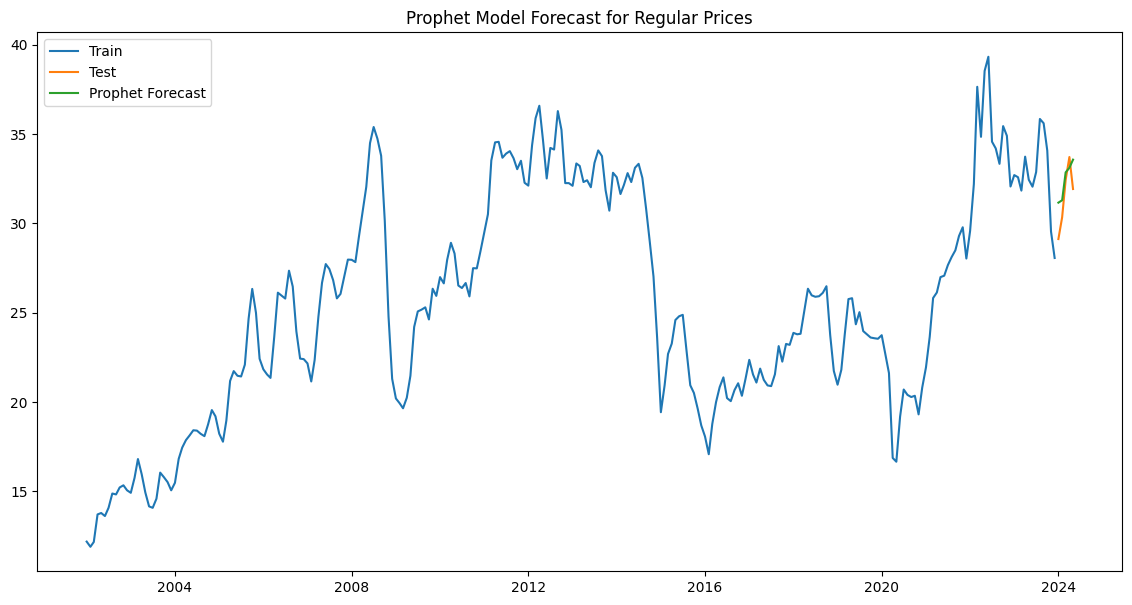

In [81]:
plt.figure(figsize=(14, 7))
plt.plot(train_regular['ds'], train_regular['y'], label='Train')
plt.plot(test_regular['ds'], test_regular['y'], label='Test')
plt.plot(test_regular['ds'], forecast_prophet_test, label='Prophet Forecast')
plt.legend()
plt.title('Prophet Model Forecast for Regular Prices')
plt.show()

### SUPER

In [82]:
train_super = prophet_df_super[prophet_df_super['ds'] < '2024-01-01']
test_super = prophet_df_super[prophet_df_super['ds'] >= '2024-01-01']
test_super = test_super[test_super['ds'] <= '2024-05-15']

prophet_model_super = Prophet()
prophet_model_super.fit(train_super)

future = prophet_model_super.make_future_dataframe(periods=len(test_super), freq='MS')
forecast_prophet = prophet_model_super.predict(future)

forecast_prophet_test = forecast_prophet.iloc[-len(test_super):]['yhat']

mae_prophet_super = mean_absolute_error(test_super['y'], forecast_prophet_test)
rmse_prophet_super = np.sqrt(mean_squared_error(test_super['y'], forecast_prophet_test))

print(f"\nProphet MAE: {mae_prophet_super}, RMSE: {rmse_prophet_super}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzciywk6b/v10bf13c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzciywk6b/3qby0jab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81869', 'data', 'file=/tmp/tmpzciywk6b/v10bf13c.json', 'init=/tmp/tmpzciywk6b/3qby0jab.json', 'output', 'file=/tmp/tmpzciywk6b/prophet_model0r60tull/prophet_model-20240803224446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:44:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:44:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prophet MAE: 0.952139906674546, RMSE: 1.1221410865522221


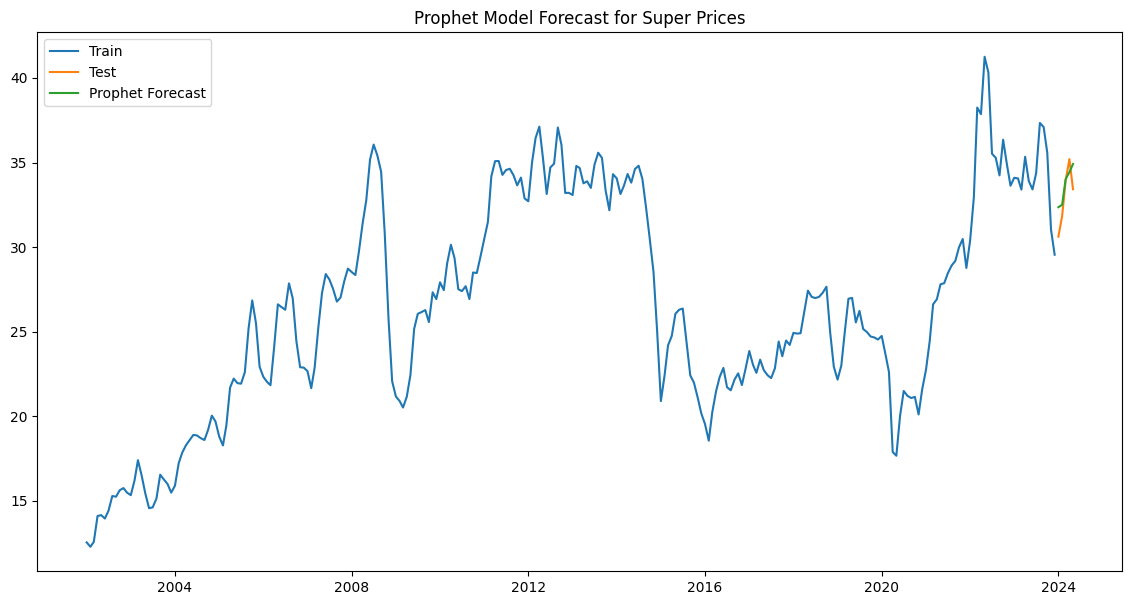

In [83]:
plt.figure(figsize=(14, 7))
plt.plot(train_super['ds'], train_super['y'], label='Train')
plt.plot(test_super['ds'], test_super['y'], label='Test')
plt.plot(test_super['ds'], forecast_prophet_test, label='Prophet Forecast')
plt.legend()
plt.title('Prophet Model Forecast for Super Prices')
plt.show()

### DIESEL

In [84]:
train_diesel = prophet_df_diesel[prophet_df_diesel['ds'] < '2024-01-01']
test_diesel = prophet_df_diesel[prophet_df_diesel['ds'] >= '2024-01-01']
test_diesel = test_diesel[test_diesel['ds'] <= '2024-05-15']

prophet_model_diesel = Prophet()
prophet_model_diesel.fit(train_diesel)

future = prophet_model_diesel.make_future_dataframe(periods=len(test_diesel), freq='MS')
forecast_prophet = prophet_model_diesel.predict(future)

forecast_prophet_test = forecast_prophet.iloc[-len(test_diesel):]['yhat']

mae_prophet_diesel = mean_absolute_error(test_diesel['y'], forecast_prophet_test)
rmse_prophet_diesel = np.sqrt(mean_squared_error(test_diesel['y'], forecast_prophet_test))

print(f"\nProphet MAE: {mae_prophet_diesel}, RMSE: {rmse_prophet_diesel}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzciywk6b/lpg9ii6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzciywk6b/yq92vd9r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86270', 'data', 'file=/tmp/tmpzciywk6b/lpg9ii6g.json', 'init=/tmp/tmpzciywk6b/yq92vd9r.json', 'output', 'file=/tmp/tmpzciywk6b/prophet_modelv16n0_ih/prophet_model-20240803224447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:44:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:44:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Prophet MAE: 0.9743733763028409, RMSE: 1.3025347443538349


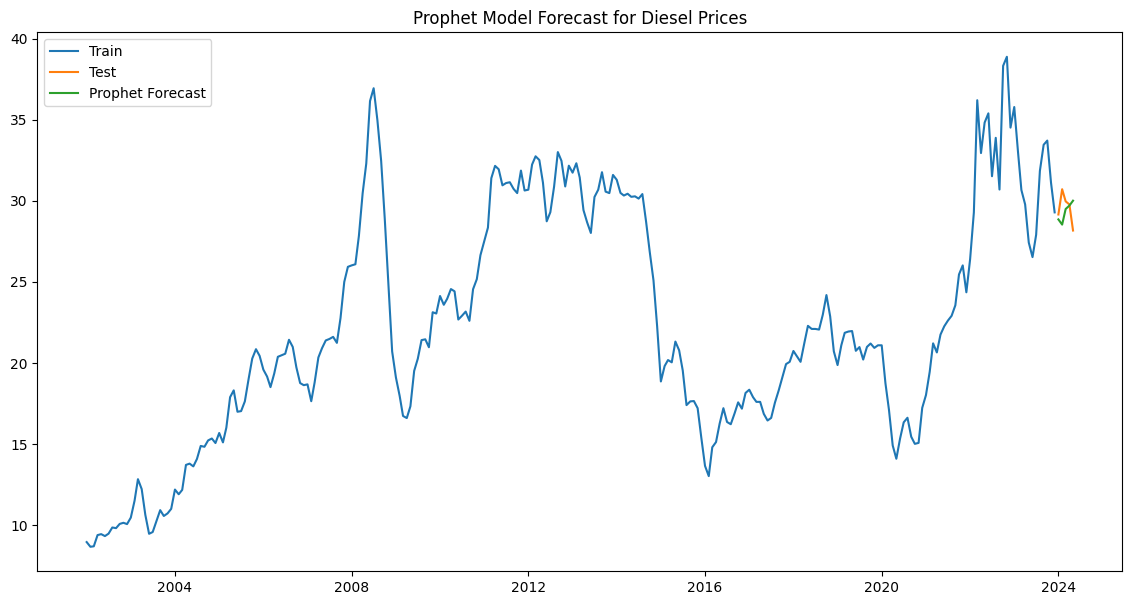

In [85]:
plt.figure(figsize=(14, 7))
plt.plot(train_diesel['ds'], train_diesel['y'], label='Train')
plt.plot(test_diesel['ds'], test_diesel['y'], label='Test')
plt.plot(test_diesel['ds'], forecast_prophet_test, label='Prophet Forecast')
plt.legend()
plt.title('Prophet Model Forecast for Diesel Prices')
plt.show()